In [10]:
import pandas as pd 

data = pd.read_csv("literacy-rate-vs-gdp-per-capita/literacy-rate-vs-gdp-per-capita.csv")

data

,Entity,Code,Year,"Adult literacy rate, population 15+ years, both sexes (%), LR.AG15T99","GDP per capita, PPP (constant 2017 international $)",Population (historical),World regions according to OWID
0,Afghanistan,AFG,1979,18.15768,NaN,13655572.0,NaN
1,Afghanistan,AFG,2011,31.44885,1961.0963,29347709.0,NaN
2,Afghanistan,AFG,2021,37.26604,1516.2733,40000411.0,NaN
3,Afghanistan,AFG,2002,NaN,1280.4631,21378123.0,NaN
4,Afghanistan,AFG,2003,NaN,1292.3335,22733054.0,NaN
...,...,...,...,...,...,...,...
59995,Zimbabwe,ZWE,1986,NaN,NaN,8982580.0,NaN
59996,Zimbabwe,ZWE,1987,NaN,NaN,9284650.0,NaN
59997,Zimbabwe,ZWE,1988,NaN,NaN,9583100.0,NaN
59998,Zimbabwe,ZWE,1989,NaN,NaN,9864797.0,NaN


In [11]:
print(data.head())

        Entity Code  Year  \
0  Afghanistan  AFG  1979   
1  Afghanistan  AFG  2011   
2  Afghanistan  AFG  2021   
3  Afghanistan  AFG  2002   
4  Afghanistan  AFG  2003   

   Adult literacy rate, population 15+ years, both sexes (%), LR.AG15T99  \
0                                           18.15768                       
1                                           31.44885                       
2                                           37.26604                       
3                                                NaN                       
4                                                NaN                       

   GDP per capita, PPP (constant 2017 international $)  \
0                                                NaN     
1                                          1961.0963     
2                                          1516.2733     
3                                          1280.4631     
4                                          1292.3335     

   Population (hist

In [12]:
# check for missing values and basic info 

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 60000 non-null  object 
 1   Code                                                                   55386 non-null  object 
 2   Year                                                                   60000 non-null  int64  
 3   Adult literacy rate, population 15+ years, both sexes (%), LR.AG15T99  1720 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                    6562 non-null   float64
 5   Population (historical)                                                59177 non-null  float64
 6   World regions according to OWID                                        271 non-null    

In [15]:
#CLEANING THE DATA 

# Select relevant columns
relevant_data = data[['Entity', 'Year', 
                      'Adult literacy rate, population 15+ years, both sexes (%), LR.AG15T99',
                      'GDP per capita, PPP (constant 2017 international $)']]

In [17]:
# Rename columns for better readability
relevant_data.columns = ['Country', 'Year', 'Literacy Rate (%)', 'GDP per Capita']

relevant_data

,Country,Year,Literacy Rate (%),GDP per Capita
0,Afghanistan,1979,18.15768,NaN
1,Afghanistan,2011,31.44885,1961.0963
2,Afghanistan,2021,37.26604,1516.2733
3,Afghanistan,2002,NaN,1280.4631
4,Afghanistan,2003,NaN,1292.3335
...,...,...,...,...
59995,Zimbabwe,1986,NaN,NaN
59996,Zimbabwe,1987,NaN,NaN
59997,Zimbabwe,1988,NaN,NaN
59998,Zimbabwe,1989,NaN,NaN


In [19]:
# Drop rows where both Literacy Rate and GDP per Capita are missing
relevant_data = relevant_data.dropna(subset=['Literacy Rate (%)', 'GDP per Capita'], how='all')

relevant_data


,Country,Year,Literacy Rate (%),GDP per Capita
0,Afghanistan,1979,18.15768,NaN
1,Afghanistan,2011,31.44885,1961.0963
2,Afghanistan,2021,37.26604,1516.2733
3,Afghanistan,2002,NaN,1280.4631
4,Afghanistan,2003,NaN,1292.3335
...,...,...,...,...
59768,Zimbabwe,2017,NaN,2331.7808
59769,Zimbabwe,2018,NaN,2399.6216
59770,Zimbabwe,2019,NaN,2203.3967
59771,Zimbabwe,2020,NaN,1990.3195


In [21]:
# Handle missing values (fill with a placeholder or drop further)
relevant_data = relevant_data.dropna()
relevant_data

,Country,Year,Literacy Rate (%),GDP per Capita
1,Afghanistan,2011,31.44885,1961.0963
2,Afghanistan,2021,37.26604,1516.2733
604,Albania,2001,98.71298,6441.4720
605,Albania,2008,95.93864,9912.1970
606,Albania,2011,96.84530,11052.8320
...,...,...,...,...
59483,Zambia,2020,87.50000,3183.6510
59740,Zimbabwe,1992,83.51258,2468.2783
59741,Zimbabwe,2011,83.58271,2033.1814
59742,Zimbabwe,2014,88.69342,2316.9546


In [23]:
# Sort by Country and Year
relevant_data = relevant_data.sort_values(by=['Country', 'Year'])

relevant_data

,Country,Year,Literacy Rate (%),GDP per Capita
1,Afghanistan,2011,31.44885,1961.0963
2,Afghanistan,2021,37.26604,1516.2733
604,Albania,2001,98.71298,6441.4720
605,Albania,2008,95.93864,9912.1970
606,Albania,2011,96.84530,11052.8320
...,...,...,...,...
59483,Zambia,2020,87.50000,3183.6510
59740,Zimbabwe,1992,83.51258,2468.2783
59741,Zimbabwe,2011,83.58271,2033.1814
59742,Zimbabwe,2014,88.69342,2316.9546


In [25]:
# Reset the index
relevant_data = relevant_data.reset_index(drop=True)

relevant_data

,Country,Year,Literacy Rate (%),GDP per Capita
0,Afghanistan,2011,31.44885,1961.0963
1,Afghanistan,2021,37.26604,1516.2733
2,Albania,2001,98.71298,6441.4720
3,Albania,2008,95.93864,9912.1970
4,Albania,2011,96.84530,11052.8320
...,...,...,...,...
1011,Zambia,2020,87.50000,3183.6510
1012,Zimbabwe,1992,83.51258,2468.2783
1013,Zimbabwe,2011,83.58271,2033.1814
1014,Zimbabwe,2014,88.69342,2316.9546


In [26]:
# Data Summary 
relevant_data.info(), relevant_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1016 non-null   object 
 1   Year               1016 non-null   int64  
 2   Literacy Rate (%)  1016 non-null   float64
 3   GDP per Capita     1016 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.9+ KB


(None,
        Country  Year  Literacy Rate (%)  GDP per Capita
 0  Afghanistan  2011           31.44885       1961.0963
 1  Afghanistan  2021           37.26604       1516.2733
 2      Albania  2001           98.71298       6441.4720
 3      Albania  2008           95.93864       9912.1970
 4      Albania  2011           96.84530      11052.8320)

In [40]:
relevant_data

,Country,Year,Literacy Rate (%),GDP per Capita
0,Afghanistan,2011,31.44885,1961.0963
1,Afghanistan,2021,37.26604,1516.2733
2,Albania,2001,98.71298,6441.4720
3,Albania,2008,95.93864,9912.1970
4,Albania,2011,96.84530,11052.8320
...,...,...,...,...
1011,Zambia,2020,87.50000,3183.6510
1012,Zimbabwe,1992,83.51258,2468.2783
1013,Zimbabwe,2011,83.58271,2033.1814
1014,Zimbabwe,2014,88.69342,2316.9546


In [43]:
print(relevant_data.dtypes)


Country               object
Year                   int64
Literacy Rate (%)    float64
GDP per Capita       float64
dtype: object


In [51]:
#Aggregate the Data at the World Leve

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

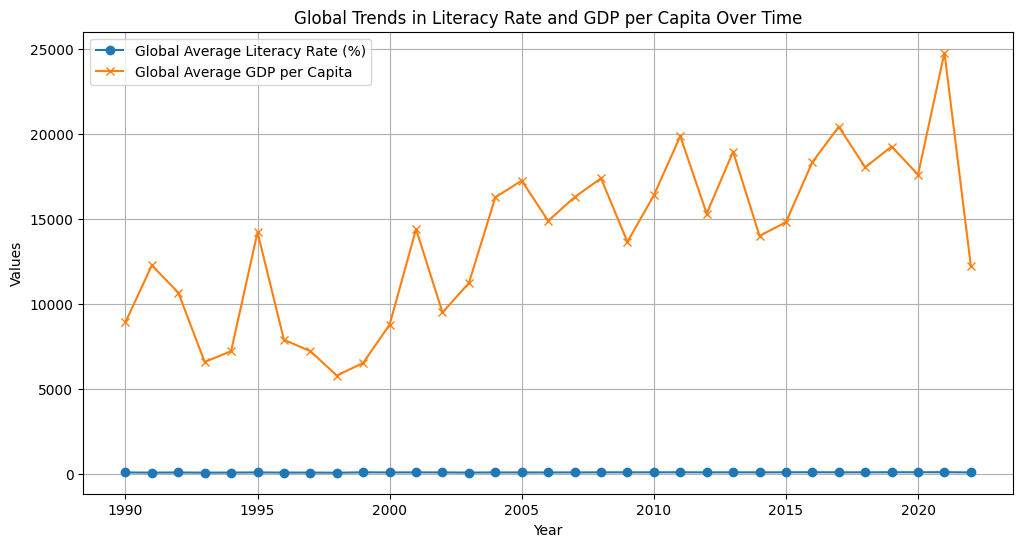

In [50]:
# Convert to numeric
relevant_data['Literacy Rate (%)'] = pd.to_numeric(relevant_data['Literacy Rate (%)'], errors='coerce')
relevant_data['GDP per Capita'] = pd.to_numeric(relevant_data['GDP per Capita'], errors='coerce')

# Drop rows with missing values
relevant_data.dropna(subset=['Literacy Rate (%)', 'GDP per Capita'], inplace=True)

# Aggregate data at the world level
world_data = relevant_data.groupby('Year').mean(numeric_only=True).reset_index()

# Visualize the trends
plt.figure(figsize=(12, 6))
plt.plot(world_data['Year'], world_data['Literacy Rate (%)'], label='Global Average Literacy Rate (%)', marker='o')
plt.plot(world_data['Year'], world_data['GDP per Capita'], label='Global Average GDP per Capita', marker='x')
plt.title('Global Trends in Literacy Rate and GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#Explanation:

#The plot shows the global average literacy rate and GDP per capita over the years available in your dataset.
#This visualization helps identify overall trends and patterns at the world level.




#Correlation Analysis
#ompute the correlation between global average literacy rate and GDP per capita.



!pip install scipy




   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 0.8/44.5 MB 4.2 MB/s eta 0:00:11
   - -------------------------------------- 2.1/44.5 MB 5.3 MB/s eta 0:00:08
   -- ------------------------------------- 3.1/44.5 MB 5.3 MB/s eta 0:00:08
   --- ------------------------------------ 4.2/44.5 MB 5.1 MB/s eta 0:00:08
   ---- ----------------------------------- 5.5/44.5 MB 5.4 MB/s eta 0:00:08
   ------ --------------------------------- 6.8/44.5 MB 5.4 MB/s eta 0:00:08
   ------- -------------------------------- 7.9/44.5 MB 5.5 MB/s eta 0:00:07
   -------- ------------------------------- 9.2/44.5 MB 5.5 MB/s eta 0:00:07
   --------- ------------------------------ 11.0/44.5 MB 5.8 MB/s eta 0:00:06
   ----------- ---------------------------- 12.6/44.5 MB 6.0 MB/s eta 0:00:06
   ------------ --------------------------- 13.6/44.5 MB 5.9 MB/s eta 0:00:06
   ------------- -------------------------- 14.9/44.5 MB 5.9 MB/s eta 0:00:05
  

C:\Users\paulo\AppData\Local\Temp\ipykernel_25620\1994521467.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_corr = relevant_data.groupby('Income Group').apply(


Correlation by Income Group:
Income Group
High Income      0.186294
Low Income      -0.009077
Middle Income    0.582233
dtype: float64


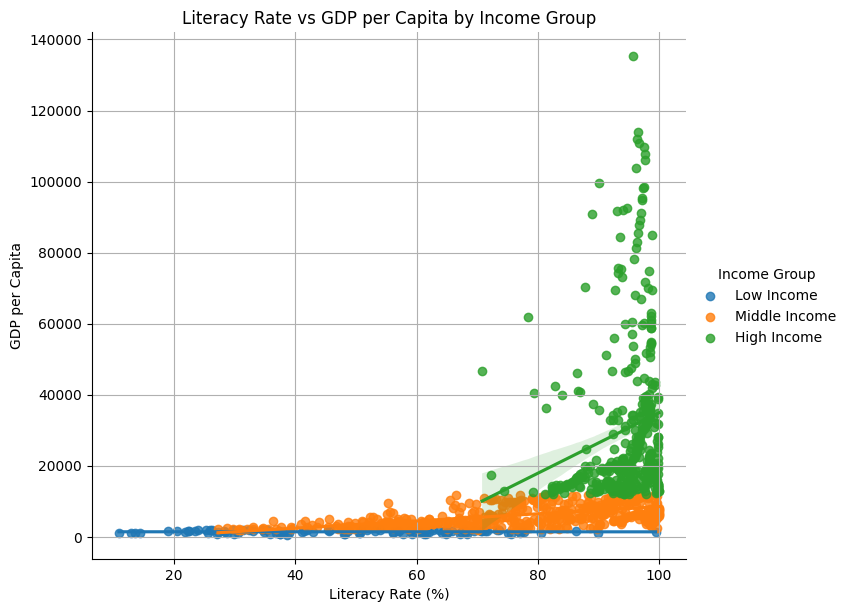

In [59]:
# Group-wise Analysis
#We can group countries into income categories (low, middle, high-income groups) and analyze trends within each group.

#Steps:
#Classify countries into income groups based on external sources or logical thresholds for GDP per capita.
#Perform group-wise correlation and regression analysis.
#Visualize trends and relationships for each group.

# Classify countries into income groups based on GDP per capita thresholds
def classify_income_group(gdp):
    if gdp < 2000:
        return 'Low Income'
    elif gdp < 12000:
        return 'Middle Income'
    else:
        return 'High Income'

# Apply the classification
relevant_data['Income Group'] = relevant_data['GDP per Capita'].apply(classify_income_group)

# Group-wise correlation analysis
group_corr = relevant_data.groupby('Income Group').apply(
    lambda group: group['Literacy Rate (%)'].corr(group['GDP per Capita'])
)

print("Correlation by Income Group:")
print(group_corr)

# Group-wise visualization
import seaborn as sns

sns.lmplot(data=relevant_data, x='Literacy Rate (%)', y='GDP per Capita', hue='Income Group', height=6, aspect=1.2)
plt.title('Literacy Rate vs GDP per Capita by Income Group')
plt.grid(True)
plt.show()



In [ ]:







# Calculate Pearson and Spearman correlation coefficients
pearson_corr = world_data['Literacy Rate (%)'].corr(world_data['GDP per Capita'], method='pearson')
spearman_corr = world_data['Literacy Rate (%)'].corr(world_data['GDP per Capita'], method='spearman')

print(f"Pearson Correlation between Global Literacy Rate and GDP per Capita: {pearson_corr:.2f}")
print(f"Spearman Correlation between Global Literacy Rate and GDP per Capita: {spearman_corr:.2f}")


Pearson Correlation between Global Literacy Rate and GDP per Capita: 0.78
Spearman Correlation between Global Literacy Rate and GDP per Capita: 0.75


In [56]:
#Interpretation:

#Pearson Correlation measures the linear relationship between the two variables.
#Spearman Correlation measures the monotonic relationship.
#Values close to 1 or -1 indicate strong relationships.


#Regression Analysis
#Perform a linear regression to quantify the relationship between global average literacy rate and GDP per capita.

!pip install statsmodels 

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 7.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.5 MB/s eta 0:00:00


In [57]:
import statsmodels.api as sm

# Prepare the data for regression
X_world = world_data['Literacy Rate (%)']  # Independent variable
y_world = world_data['GDP per Capita']     # Dependent variable

# Add a constant to the independent variable
X_world = sm.add_constant(X_world)

# Fit the regression model
world_model = sm.OLS(y_world, X_world).fit()

# Print the regression summary
print(world_model.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP per Capita   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     47.67
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           9.65e-08
Time:                        00:13:32   Log-Likelihood:                -310.71
No. Observations:                  33   AIC:                             625.4
Df Residuals:                      31   BIC:                             628.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.664e+04   5887.83

In [ ]:
#Interpretation:

#Coefficients: Estimate the impact of literacy rate on GDP per capita at the global level.
#R-squared: Indicates how much of the variability in GDP per capita is explained by literacy rate.



In [ ]:
#Visualize the Regression Line

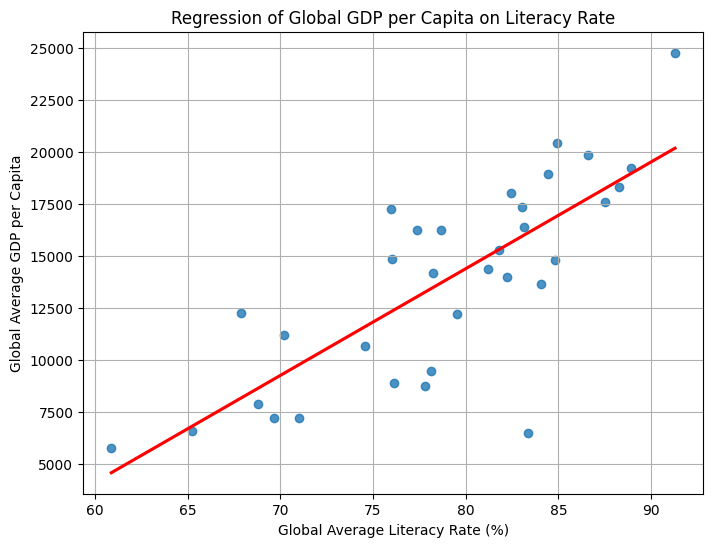

In [58]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Literacy Rate (%)', y='GDP per Capita', data=world_data, ci=None, line_kws={'color':'red'})
plt.title('Regression of Global GDP per Capita on Literacy Rate')
plt.xlabel('Global Average Literacy Rate (%)')
plt.ylabel('Global Average GDP per Capita')
plt.grid(True)
plt.show()
